## VMT Analysis

In [39]:
import pathlib 
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"
OUTPUT_DIRECTORY = NOTEBOOK_PATH / "docs"

In [40]:
import pandas as pd
import geopandas as gpd

data = gpd.read_file("data/TAQA_Data/mjr_rds_2023.gpkg")

In [41]:
data.head()

,OBJECTID,MRTNI_Func,MRTNIcogid,ONE_WAY,COGID,RTE,LOCAT,LENGTH,MILES,ADT22,...,ADT02,AWDT02,ADT01,AWDT01,ADT00,AWDT00,Shape_Length,ADT23,AWDT23,geometry
0,1,8,1998,E,NaN,None,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,954.968271,NaN,NaN,"MULTILINESTRING ((1537901.27281 1518885.41196,..."
1,2,4,1999,B,NaN,None,NORTH OF MEADE - SOUTH OF CONDERSHIRE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,841.849864,NaN,NaN,"MULTILINESTRING ((1497526.51531 1463666.51518,..."
2,3,2,10003,B,10003.0,UNSER BLVD.,NORTH OF NORTHERN - SOUTH OF 15TH AVE.,2106.069,0.399,22160.0,...,11133.0,11633.0,10829.0,11316.0,10412.0,10880.0,2106.068785,21852.0,23529.0,"MULTILINESTRING ((1507058.99985 1555528.75009,..."
3,4,2,10004,B,10004.0,N.M. 528,NORTH OF CORRALES RD. (NM 448) - .118 MILES N...,648.945,0.123,25188.0,...,25340.0,26479.0,20742.0,21674.0,19942.0,20838.0,669.271899,25134.0,26844.0,"MULTILINESTRING ((1530760.33729 1555735.63912,..."
4,5,4,10005,B,10005.0,GRANDE VISTA,NORTH OF CORRALES RD. - SOUTH OF SANDIA VISTA,1070.855,0.203,2087.0,...,2100.0,2225.0,1792.0,1898.0,1723.0,1825.0,1033.030125,2058.0,2301.0,"MULTILINESTRING ((1531922.80708 1555068.59616,..."


In [42]:
data.columns

Index(['OBJECTID', 'MRTNI_Func', 'MRTNIcogid', 'ONE_WAY', 'COGID', 'RTE',
       'LOCAT', 'LENGTH', 'MILES', 'ADT22', 'AWDT22', 'flag22', 'ADT21',
       'AWDT21', 'flag21', 'ADT20', 'AWDT20', 'flag20', 'ADT19', 'AWDT19',
       'flag19', 'ADT18', 'AWDT18', 'flag18', 'ADT17', 'AWDT17', 'flag17',
       'ADT16', 'AWDT16', 'ADT15', 'AWDT15', 'ADT14', 'AWDT14', 'ADT13',
       'AWDT13', 'ADT12', 'AWDT12', 'ADT11', 'AWDT11', 'ADT10', 'AWDT10',
       'ADT09', 'AWDT09', 'ADT08', 'AWDT08', 'ADT07', 'AWDT07', 'ADT06',
       'AWDT06', 'ADT05', 'AWDT05', 'ADT04', 'AWDT04', 'ADT03', 'AWDT03',
       'ADT02', 'AWDT02', 'ADT01', 'AWDT01', 'ADT00', 'AWDT00', 'Shape_Length',
       'ADT23', 'AWDT23', 'geometry'],
      dtype='object')

In [43]:
data.shape

(3050, 65)

In [44]:
import geopandas as gpd

# Re-import the updated GeoPackage
updated_data = gpd.read_file("docs/traffic_change_analysis.gpkg", layer="traffic_pct_change")

In [45]:
updated_data.columns

Index(['COGID', 'RTE', 'LOCAT', 'PRE_ART_2_YEAR_MEAN', 'POST_ART_2_YEAR_MEAN',
       'PRE_ART_5_YEAR_MEAN', 'POST_ART_5_YEAR_MEAN', 'PCT_CHANGE_2_YR',
       'PCT_CHANGE_5_YR', 'PCT_2_YR_CLEAN', 'PCT_5_YR_CLEAN', 'IS_ART',
       'IS_ART_ADJ', 'ABS_CHANGE_2_YR', 'ABS_CHANGE_5_YR', 'ABS_2_YR_CLEAN',
       'ABS_5_YR_CLEAN', 'geometry'],
      dtype='object')

In [46]:
updated_data.shape

(3048, 18)

In [47]:
import pandas as pd

coal_links = pd.read_csv('data/COAL_FLAG.csv')
lead_links = pd.read_csv('data/LEAD_FLAG.csv')
zuni_links = pd.read_csv('data/ZUNI_FLAG.csv')
lomas_links = pd.read_csv('data/LOMAS_FLAG.csv')
lomas_links.head()

,COGID,RTE,LOCAT
0,24100,LOMAS,EAST OF CENTRAL - WEST OF 12TH ST.
1,24160,LOMAS,EAST OF 12TH ST. - WEST OF 6TH ST.
2,24164,LOMAS,EAST OF PAN AM EAST - WEST OF UNIVERSITY
3,24172,LOMAS,EAST OF 5TH ST. - WEST OF 4TH ST.
4,24176,LOMAS,EAST OF PAN AMERICAN WEST - WEST OF PAN AMERIC...


In [48]:
lomas_links.dtypes

COGID     int64
RTE      object
LOCAT    object
dtype: object

In [49]:
# Convert COGID columns to string
coal_links['COGID'] = coal_links['COGID'].astype(str)
lead_links['COGID'] = lead_links['COGID'].astype(str)
zuni_links['COGID'] = zuni_links['COGID'].astype(str)
lomas_links['COGID'] = lomas_links['COGID'].astype(str)
lomas_links.dtypes

COGID    object
RTE      object
LOCAT    object
dtype: object

In [50]:
coal_links.head()

,COGID,RTE,LOCAT
0,25136,COAL,SOUTHEAST OF ALCALDE - WEST OF 14TH ST.
1,25138,COAL,EAST OF 14TH ST. - WEST OF 12TH ST.
2,25224,COAL,EAST OF 12TH ST. - WEST OF 10TH ST.
3,25225,COAL,EAST OF 10TH ST. - WEST OF 8TH ST.
4,25252,COAL,EAST OF 8TH ST. - WEST OF 6TH ST.


In [51]:
# First, keep only needed columns from 'data'
# dang, we need to change the COGID dtype so that it can join cleanly
miles_df = data[['COGID', 'MILES']]

miles_df.dtypes

COGID    float64
MILES    float64
dtype: object

In [52]:
# First, drop rows where COGID is missing (optional, but usually best)
miles_df = miles_df.dropna(subset=['COGID'])

# Then convert to integer, then string (if needed)
miles_df['COGID'] = miles_df['COGID'].astype(int).astype(str)

# Do the same for updated_data (just in case it's stored as object, not str)
updated_data['COGID'] = updated_data['COGID'].astype(str)
miles_df.dtypes

COGID     object
MILES    float64
dtype: object

In [53]:
updated_data.dtypes

COGID                     object
RTE                       object
LOCAT                     object
PRE_ART_2_YEAR_MEAN      float64
POST_ART_2_YEAR_MEAN     float64
PRE_ART_5_YEAR_MEAN      float64
POST_ART_5_YEAR_MEAN     float64
PCT_CHANGE_2_YR          float64
PCT_CHANGE_5_YR          float64
PCT_2_YR_CLEAN           float64
PCT_5_YR_CLEAN           float64
IS_ART                     int64
IS_ART_ADJ                 int64
ABS_CHANGE_2_YR          float64
ABS_CHANGE_5_YR          float64
ABS_2_YR_CLEAN           float64
ABS_5_YR_CLEAN           float64
geometry                geometry
dtype: object

In [54]:
# Merge on COGID
merged = updated_data.merge(miles_df, on='COGID', how='left')

# Optional: check for missing values
missing_miles = merged[merged['MILES'].isna()]
print(f"Missing miles: {len(missing_miles)} rows")

Missing miles: 1 rows


In [55]:
# Filter the row(s) with missing MILES
missing_row = merged[merged['MILES'].isna()]

# Display the relevant columns
print(missing_row[['COGID', 'RTE', 'LOCAT']])


      COGID                RTE                        LOCAT
1912  25621  P.D.N./2ND INTCH.  PDN EBD OFF RAMP TO 2ND SBD


In [56]:
# Drop rows with missing MILES
merged = merged.dropna(subset=['MILES'])


In [57]:
merged.columns

Index(['COGID', 'RTE', 'LOCAT', 'PRE_ART_2_YEAR_MEAN', 'POST_ART_2_YEAR_MEAN',
       'PRE_ART_5_YEAR_MEAN', 'POST_ART_5_YEAR_MEAN', 'PCT_CHANGE_2_YR',
       'PCT_CHANGE_5_YR', 'PCT_2_YR_CLEAN', 'PCT_5_YR_CLEAN', 'IS_ART',
       'IS_ART_ADJ', 'ABS_CHANGE_2_YR', 'ABS_CHANGE_5_YR', 'ABS_2_YR_CLEAN',
       'ABS_5_YR_CLEAN', 'geometry', 'MILES'],
      dtype='object')

In [58]:
# Create sets of COGIDs for fast lookup
coal_ids = set(coal_links['COGID'])
lead_ids = set(lead_links['COGID'])
zuni_ids = set(zuni_links['COGID'])
lomas_ids = set(lomas_links['COGID'])

# Add flags to merged
merged['IS_COAL'] = merged['COGID'].isin(coal_ids).astype(int)
merged['IS_LEAD'] = merged['COGID'].isin(lead_ids).astype(int)
merged['IS_ZUNI'] = merged['COGID'].isin(zuni_ids).astype(int)
merged['IS_LOMAS'] = merged['COGID'].isin(lomas_ids).astype(int)
merged.columns

Index(['COGID', 'RTE', 'LOCAT', 'PRE_ART_2_YEAR_MEAN', 'POST_ART_2_YEAR_MEAN',
       'PRE_ART_5_YEAR_MEAN', 'POST_ART_5_YEAR_MEAN', 'PCT_CHANGE_2_YR',
       'PCT_CHANGE_5_YR', 'PCT_2_YR_CLEAN', 'PCT_5_YR_CLEAN', 'IS_ART',
       'IS_ART_ADJ', 'ABS_CHANGE_2_YR', 'ABS_CHANGE_5_YR', 'ABS_2_YR_CLEAN',
       'ABS_5_YR_CLEAN', 'geometry', 'MILES', 'IS_COAL', 'IS_LEAD', 'IS_ZUNI',
       'IS_LOMAS'],
      dtype='object')

In [59]:
lom_links = merged[merged['IS_LOMAS'] == 1]
lom_links.head()

,COGID,RTE,LOCAT,PRE_ART_2_YEAR_MEAN,POST_ART_2_YEAR_MEAN,PRE_ART_5_YEAR_MEAN,POST_ART_5_YEAR_MEAN,PCT_CHANGE_2_YR,PCT_CHANGE_5_YR,PCT_2_YR_CLEAN,...,ABS_CHANGE_2_YR,ABS_CHANGE_5_YR,ABS_2_YR_CLEAN,ABS_5_YR_CLEAN,geometry,MILES,IS_COAL,IS_LEAD,IS_ZUNI,IS_LOMAS
1570,24100,LOMAS,EAST OF CENTRAL - WEST OF 12TH ST.,12053.5,12526.0,12017.4,11262.4,3.920023,-6.282557,3.92,...,472.5,-755.0,472.0,-755.0,"MULTILINESTRING ((-106.66877 35.09365, -106.66...",0.529,0,0,0,1
1580,24160,LOMAS,EAST OF 12TH ST. - WEST OF 6TH ST.,17529.5,10134.5,16755.2,11548.2,-42.186029,-31.076919,-42.19,...,-7395.0,-5207.0,-7395.0,-5207.0,"MULTILINESTRING ((-106.65973 35.09219, -106.65...",0.395,0,0,0,1
1581,24164,LOMAS,EAST OF PAN AM EAST - WEST OF UNIVERSITY,29447.5,27487.0,30379.8,24257.2,-6.657611,-20.153523,-6.66,...,-1960.5,-6122.6,-1960.0,-6123.0,"MULTILINESTRING ((-106.63364 35.09169, -106.63...",0.506,0,0,0,1
1583,24172,LOMAS,EAST OF 5TH ST. - WEST OF 4TH ST.,19810.0,17280.5,20362.8,16295.2,-12.768804,-19.975642,-12.77,...,-2529.5,-4067.6,-2530.0,-4068.0,"MULTILINESTRING ((-106.65156 35.09134, -106.65...",0.069,0,0,0,1
1584,24176,LOMAS,EAST OF PAN AMERICAN WEST - WEST OF PAN AMERIC...,27437.5,26176.5,26884.8,22822.6,-4.595900,-15.109653,-4.60,...,-1261.0,-4062.2,-1261.0,-4062.0,"MULTILINESTRING ((-106.63539 35.0909, -106.634...",0.113,0,0,0,1


In [60]:
# I want to compare VMT - we can compute VMT change by multiplying by AADT change
merged['VMT_CHANGE_2_YR'] = merged['ABS_2_YR_CLEAN'] * merged['MILES']
merged['VMT_CHANGE_5_YR'] = merged['ABS_5_YR_CLEAN'] * merged['MILES']
merged.columns

Index(['COGID', 'RTE', 'LOCAT', 'PRE_ART_2_YEAR_MEAN', 'POST_ART_2_YEAR_MEAN',
       'PRE_ART_5_YEAR_MEAN', 'POST_ART_5_YEAR_MEAN', 'PCT_CHANGE_2_YR',
       'PCT_CHANGE_5_YR', 'PCT_2_YR_CLEAN', 'PCT_5_YR_CLEAN', 'IS_ART',
       'IS_ART_ADJ', 'ABS_CHANGE_2_YR', 'ABS_CHANGE_5_YR', 'ABS_2_YR_CLEAN',
       'ABS_5_YR_CLEAN', 'geometry', 'MILES', 'IS_COAL', 'IS_LEAD', 'IS_ZUNI',
       'IS_LOMAS', 'VMT_CHANGE_2_YR', 'VMT_CHANGE_5_YR'],
      dtype='object')

In [61]:
# Daily VMTs before and after ART
# I Want more context - the VMT percent change is important
merged['PRE_VMT_2_YR'] = merged['PRE_ART_2_YEAR_MEAN'] * merged['MILES']
merged['POST_VMT_2_YR'] = merged['POST_ART_2_YEAR_MEAN'] * merged['MILES']

# Now percent change in VMT
merged['VMT_PCT_CHANGE_2_YR'] = ((merged['POST_VMT_2_YR'] - merged['PRE_VMT_2_YR']) / merged['PRE_VMT_2_YR']) * 100

#Let's do it for the 5 year as well:
merged['PRE_VMT_5_YR'] = merged['PRE_ART_5_YEAR_MEAN'] * merged['MILES']
merged['POST_VMT_5_YR'] = merged['POST_ART_5_YEAR_MEAN'] * merged['MILES']

merged['VMT_PCT_CHANGE_5_YR'] = ((merged['POST_VMT_5_YR'] - merged['PRE_VMT_5_YR']) / merged['PRE_VMT_5_YR']) * 100

merged.columns

Index(['COGID', 'RTE', 'LOCAT', 'PRE_ART_2_YEAR_MEAN', 'POST_ART_2_YEAR_MEAN',
       'PRE_ART_5_YEAR_MEAN', 'POST_ART_5_YEAR_MEAN', 'PCT_CHANGE_2_YR',
       'PCT_CHANGE_5_YR', 'PCT_2_YR_CLEAN', 'PCT_5_YR_CLEAN', 'IS_ART',
       'IS_ART_ADJ', 'ABS_CHANGE_2_YR', 'ABS_CHANGE_5_YR', 'ABS_2_YR_CLEAN',
       'ABS_5_YR_CLEAN', 'geometry', 'MILES', 'IS_COAL', 'IS_LEAD', 'IS_ZUNI',
       'IS_LOMAS', 'VMT_CHANGE_2_YR', 'VMT_CHANGE_5_YR', 'PRE_VMT_2_YR',
       'POST_VMT_2_YR', 'VMT_PCT_CHANGE_2_YR', 'PRE_VMT_5_YR', 'POST_VMT_5_YR',
       'VMT_PCT_CHANGE_5_YR'],
      dtype='object')

In [62]:
merged.to_file("ART_VMT_FINAL.gpkg", layer='vmt_analysis', driver='GPKG')


In [63]:
summary_2yr = {
    'ART': merged.loc[merged['IS_ART'] == 1, 'VMT_CHANGE_2_YR'].sum(),
    'Lead': merged.loc[merged['IS_LEAD'] == 1, 'VMT_CHANGE_2_YR'].sum(),
    'Coal': merged.loc[merged['IS_COAL'] == 1, 'VMT_CHANGE_2_YR'].sum(),
    'Zuni': merged.loc[merged['IS_ZUNI'] == 1, 'VMT_CHANGE_2_YR'].sum(),
    'Lomas': merged.loc[merged['IS_LOMAS'] == 1, 'VMT_CHANGE_2_YR'].sum(),
}

summary_5yr = {
    'ART': merged.loc[merged['IS_ART'] == 1, 'VMT_CHANGE_5_YR'].sum(),
    'Lead': merged.loc[merged['IS_LEAD'] == 1, 'VMT_CHANGE_5_YR'].sum(),
    'Coal': merged.loc[merged['IS_COAL'] == 1, 'VMT_CHANGE_5_YR'].sum(),
    'Zuni': merged.loc[merged['IS_ZUNI'] == 1, 'VMT_CHANGE_5_YR'].sum(),
    'Lomas': merged.loc[merged['IS_LOMAS'] == 1, 'VMT_CHANGE_5_YR'].sum(),
}

In [64]:
summary_pct_2yr = {
    'ART': merged.loc[merged['IS_ART'] == 1, 'VMT_PCT_CHANGE_2_YR'].mean(),
    'Lead': merged.loc[merged['IS_LEAD'] == 1, 'VMT_PCT_CHANGE_2_YR'].mean(),
    'Coal': merged.loc[merged['IS_COAL'] == 1, 'VMT_PCT_CHANGE_2_YR'].mean(),
    'Zuni': merged.loc[merged['IS_ZUNI'] == 1, 'VMT_PCT_CHANGE_2_YR'].mean(),
    'Lomas': merged.loc[merged['IS_LOMAS'] == 1, 'VMT_PCT_CHANGE_2_YR'].mean(),
}

summary_pct_5yr = {
    'ART': merged.loc[merged['IS_ART'] == 1, 'VMT_PCT_CHANGE_5_YR'].mean(),
    'Lead': merged.loc[merged['IS_LEAD'] == 1, 'VMT_PCT_CHANGE_5_YR'].mean(),
    'Coal': merged.loc[merged['IS_COAL'] == 1, 'VMT_PCT_CHANGE_5_YR'].mean(),
    'Zuni': merged.loc[merged['IS_ZUNI'] == 1, 'VMT_PCT_CHANGE_5_YR'].mean(),
    'Lomas': merged.loc[merged['IS_LOMAS'] == 1, 'VMT_PCT_CHANGE_5_YR'].mean(),
}


In [65]:
print("2-Year VMT Percent Change by Corridor:")
for k, v in summary_pct_2yr.items():
    print(f"{k}: {v:.2f}%")

print("\n5-Year VMT Percent Change by Corridor:")
for k, v in summary_pct_5yr.items():
    print(f"{k}: {v:.2f}%")


2-Year VMT Percent Change by Corridor:
ART: -13.81%
Lead: 8.83%
Coal: 9.10%
Zuni: -15.82%
Lomas: -6.95%

5-Year VMT Percent Change by Corridor:
ART: -24.68%
Lead: 1.37%
Coal: 4.30%
Zuni: -5.98%
Lomas: -12.51%


In [66]:
for corridor, vmt_change in summary_2yr.items():
    print(f"{corridor}: {vmt_change:,.0f} VMT/day")


ART: -30,583 VMT/day
Lead: 3,600 VMT/day
Coal: 3,452 VMT/day
Zuni: -4,689 VMT/day
Lomas: -4,034 VMT/day


In [67]:
for corridor, vmt_change in summary_5yr.items():
    print(f"{corridor}: {vmt_change:,.0f} VMT/day")


ART: -53,203 VMT/day
Lead: 1,499 VMT/day
Coal: 1,439 VMT/day
Zuni: -1,419 VMT/day
Lomas: -14,176 VMT/day


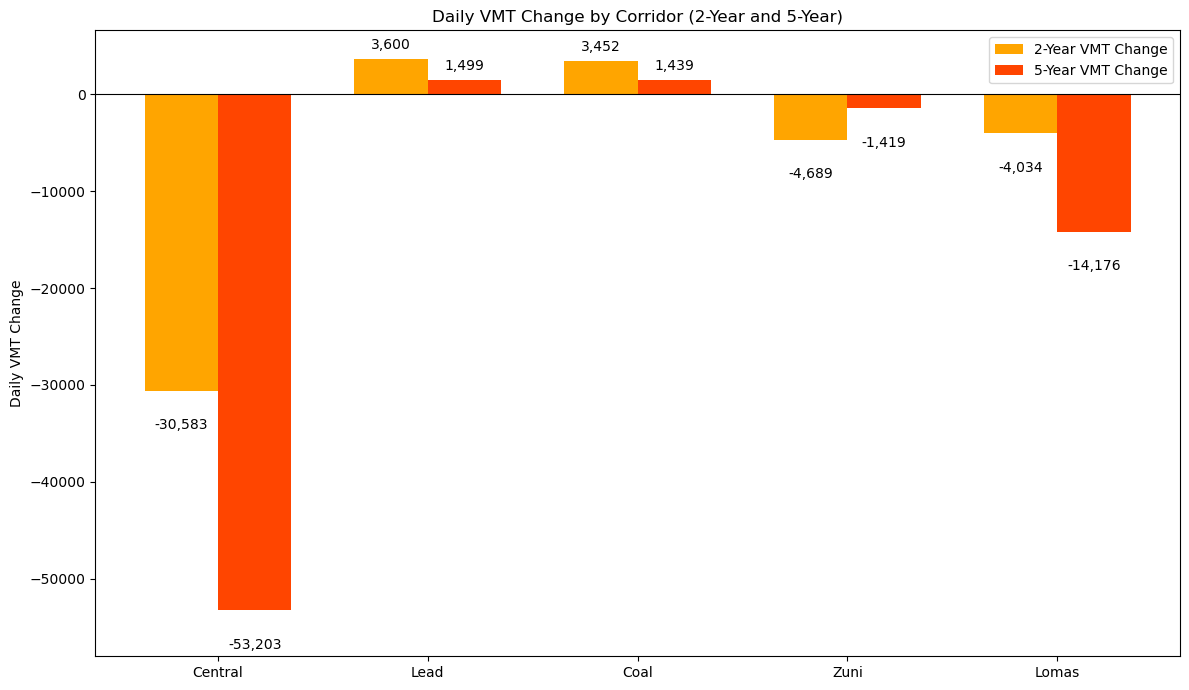

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Updated corridor names (manual label change from 'ART' to 'Central')
corridors = ['Central', 'Lead', 'Coal', 'Zuni', 'Lomas']
vmt_change_2yr = [-30583, 3600, 3452, -4689, -4034]
vmt_change_5yr = [-53203, 1499, 1439, -1419, -14176]

x = np.arange(len(corridors))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))

bars1 = ax.bar(x - width/2, vmt_change_2yr, width, label='2-Year VMT Change', color='orange')
bars2 = ax.bar(x + width/2, vmt_change_5yr, width, label='5-Year VMT Change', color='orangered')

# Set labels and title
ax.set_ylabel('Daily VMT Change')
ax.set_title('Daily VMT Change by Corridor (2-Year and 5-Year)')
ax.set_xticks(x)
ax.set_xticklabels(corridors)
ax.axhline(0, color='black', linewidth=0.8)
ax.legend()

# Set custom y-axis limits for spacing
ax.set_ylim(-58000, max(vmt_change_2yr + vmt_change_5yr) + 3000)

# Annotate bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height):,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5 if height >= 0 else -20),  # lower if negative
                    textcoords="offset points",
                    ha='center', va='bottom' if height >= 0 else 'top')

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()

plt.savefig("vmt_change_by_corridor_PLT.png", dpi=300)

plt.show()


In [31]:
import geopandas as gpd

east_vmt = gpd.read_file("docs/ART_EAST_STUDY_AREA.gpkg")
east_vmt.head()

,COGID,RTE,LOCAT,PRE_ART_2_YEAR_MEAN,POST_ART_2_YEAR_MEAN,PRE_ART_5_YEAR_MEAN,POST_ART_5_YEAR_MEAN,PCT_CHANGE_2_YR,PCT_CHANGE_5_YR,PCT_2_YR_CLEAN,...,IS_LOMAS,VMT_CHANGE_2_YR,VMT_CHANGE_5_YR,PRE_VMT_2_YR,POST_VMT_2_YR,VMT_PCT_CHANGE_2_YR,PRE_VMT_5_YR,POST_VMT_5_YR,VMT_PCT_CHANGE_5_YR,geometry
0,24100,LOMAS,EAST OF CENTRAL - WEST OF 12TH ST.,12053.5,12526.0,12017.4,11262.4,3.920023,-6.282557,3.92,...,1,249.687993,-399.394988,6376.301310,6626.253803,3.920023,6357.204411,5957.809423,-6.282557,"MULTILINESTRING ((-106.66877 35.09365, -106.66..."
1,24160,LOMAS,EAST OF 12TH ST. - WEST OF 6TH ST.,17529.5,10134.5,16755.2,11548.2,-42.186029,-31.076919,-42.19,...,1,-2921.025079,-2056.765056,6924.152688,4003.127609,-42.186029,6618.304180,4561.539124,-31.076919,"MULTILINESTRING ((-106.65973 35.09219, -106.65..."
2,24164,LOMAS,EAST OF PAN AM EAST - WEST OF UNIVERSITY,29447.5,27487.0,30379.8,24257.2,-6.657611,-20.153523,-6.66,...,1,-991.759965,-3098.237892,14900.434480,13908.421515,-6.657611,15372.178264,12274.142772,-20.153523,"MULTILINESTRING ((-106.63364 35.09169, -106.63..."
3,24172,LOMAS,EAST OF 5TH ST. - WEST OF 4TH ST.,19810.0,17280.5,20362.8,16295.2,-12.768804,-19.975642,-12.77,...,1,-174.569996,-280.691993,1366.889966,1192.354470,-12.768804,1405.033165,1124.368772,-19.975642,"MULTILINESTRING ((-106.65156 35.09134, -106.65..."
4,24176,LOMAS,EAST OF PAN AMERICAN WEST - WEST OF PAN AMERIC...,27437.5,26176.5,26884.8,22822.6,-4.595900,-15.109653,-4.60,...,1,-142.492998,-459.005992,3100.437446,2957.944449,-4.595900,3037.982347,2578.953755,-15.109653,"MULTILINESTRING ((-106.63539 35.0909, -106.634..."


In [32]:
east_vmt.shape

(85, 31)

In [33]:
east_vmt['COGID'].value_counts()[east_vmt['COGID'].value_counts() > 1]


COGID
24868    2
Name: count, dtype: int64

In [34]:
east_vmt[east_vmt['COGID'].duplicated(keep=False)]


,COGID,RTE,LOCAT,PRE_ART_2_YEAR_MEAN,POST_ART_2_YEAR_MEAN,PRE_ART_5_YEAR_MEAN,POST_ART_5_YEAR_MEAN,PCT_CHANGE_2_YR,PCT_CHANGE_5_YR,PCT_2_YR_CLEAN,...,IS_LOMAS,VMT_CHANGE_2_YR,VMT_CHANGE_5_YR,PRE_VMT_2_YR,POST_VMT_2_YR,VMT_PCT_CHANGE_2_YR,PRE_VMT_5_YR,POST_VMT_5_YR,VMT_PCT_CHANGE_5_YR,geometry
27,24868,COPPER,EAST OF 2ND ST. - NORTH OF CENTRAL,4057.0,4435.0,3674.0,3709.6,9.317229,0.968971,9.32,...,0,44.226,4.212,474.668995,518.894994,9.317229,429.857995,434.023195,0.968971,"MULTILINESTRING ((-106.64903 35.08525, -106.64..."
28,24868,COPPER,EAST OF 2ND ST. - NORTH OF CENTRAL,4057.0,4435.0,3674.0,3709.6,9.317229,0.968971,9.32,...,0,44.226,4.212,474.668995,518.894994,9.317229,429.857995,434.023195,0.968971,"MULTILINESTRING ((-106.64803 35.0841, -106.648..."


In [35]:
east_vmt = east_vmt.drop_duplicates(subset='COGID', keep='last')


In [36]:
east_vmt.shape

(84, 31)

<Axes: >

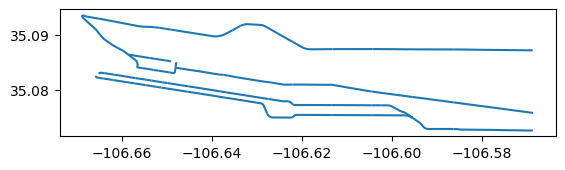

In [37]:
east_vmt.plot()

In [38]:
east_vmt.dtypes

COGID                     object
RTE                       object
LOCAT                     object
PRE_ART_2_YEAR_MEAN      float64
POST_ART_2_YEAR_MEAN     float64
PRE_ART_5_YEAR_MEAN      float64
POST_ART_5_YEAR_MEAN     float64
PCT_CHANGE_2_YR          float64
PCT_CHANGE_5_YR          float64
PCT_2_YR_CLEAN           float64
PCT_5_YR_CLEAN           float64
IS_ART                     int64
IS_ART_ADJ                 int64
ABS_CHANGE_2_YR          float64
ABS_CHANGE_5_YR          float64
ABS_2_YR_CLEAN           float64
ABS_5_YR_CLEAN           float64
MILES                    float64
IS_COAL                    int64
IS_LEAD                    int64
IS_ZUNI                    int64
IS_LOMAS                   int64
VMT_CHANGE_2_YR          float64
VMT_CHANGE_5_YR          float64
PRE_VMT_2_YR             float64
POST_VMT_2_YR            float64
VMT_PCT_CHANGE_2_YR      float64
PRE_VMT_5_YR             float64
POST_VMT_5_YR            float64
VMT_PCT_CHANGE_5_YR      float64
geometry  

In [39]:
summary_2yr_east = {
    'Central': east_vmt.loc[east_vmt['IS_ART'] == 1, 'VMT_CHANGE_2_YR'].sum(),
    'Lead': east_vmt.loc[east_vmt['IS_LEAD'] == 1, 'VMT_CHANGE_2_YR'].sum(),
    'Coal': east_vmt.loc[east_vmt['IS_COAL'] == 1, 'VMT_CHANGE_2_YR'].sum(),
    'Zuni': east_vmt.loc[east_vmt['IS_ZUNI'] == 1, 'VMT_CHANGE_2_YR'].sum(),
    'Lomas': east_vmt.loc[east_vmt['IS_LOMAS'] == 1, 'VMT_CHANGE_2_YR'].sum(),
}

summary_5yr_east = {
    'Central': east_vmt.loc[east_vmt['IS_ART'] == 1, 'VMT_CHANGE_5_YR'].sum(),
    'Lead': east_vmt.loc[east_vmt['IS_LEAD'] == 1, 'VMT_CHANGE_5_YR'].sum(),
    'Coal': east_vmt.loc[east_vmt['IS_COAL'] == 1, 'VMT_CHANGE_5_YR'].sum(),
    'Zuni': east_vmt.loc[east_vmt['IS_ZUNI'] == 1, 'VMT_CHANGE_5_YR'].sum(),
    'Lomas': east_vmt.loc[east_vmt['IS_LOMAS'] == 1, 'VMT_CHANGE_5_YR'].sum(),
}
summary_2yr_east

{'Central': np.float64(-16664.964773982763),
 'Lead': np.float64(3600.135014861822),
 'Coal': np.float64(3451.5470314621925),
 'Zuni': np.float64(-4689.304976820946),
 'Lomas': np.float64(-4033.6580043956637)}

In [40]:
summary_pct_2yr_east = {
    'Central': east_vmt.loc[east_vmt['IS_ART'] == 1, 'VMT_PCT_CHANGE_2_YR'].mean(),
    'Lead': east_vmt.loc[east_vmt['IS_LEAD'] == 1, 'VMT_PCT_CHANGE_2_YR'].mean(),
    'Coal': east_vmt.loc[east_vmt['IS_COAL'] == 1, 'VMT_PCT_CHANGE_2_YR'].mean(),
    'Zuni': east_vmt.loc[east_vmt['IS_ZUNI'] == 1, 'VMT_PCT_CHANGE_2_YR'].mean(),
    'Lomas': east_vmt.loc[east_vmt['IS_LOMAS'] == 1, 'VMT_PCT_CHANGE_2_YR'].mean(),
}

summary_pct_5yr_east = {
    'Central': east_vmt.loc[east_vmt['IS_ART'] == 1, 'VMT_PCT_CHANGE_5_YR'].mean(),
    'Lead': east_vmt.loc[east_vmt['IS_LEAD'] == 1, 'VMT_PCT_CHANGE_5_YR'].mean(),
    'Coal': east_vmt.loc[east_vmt['IS_COAL'] == 1, 'VMT_PCT_CHANGE_5_YR'].mean(),
    'Zuni': east_vmt.loc[east_vmt['IS_ZUNI'] == 1, 'VMT_PCT_CHANGE_5_YR'].mean(),
    'Lomas': east_vmt.loc[east_vmt['IS_LOMAS'] == 1, 'VMT_PCT_CHANGE_5_YR'].mean(),
}
summary_pct_2yr_east

{'Central': np.float64(-16.113983162553506),
 'Lead': np.float64(8.828033563065373),
 'Coal': np.float64(9.096975575365695),
 'Zuni': np.float64(-15.817481542791713),
 'Lomas': np.float64(-6.950837726263508)}

In [41]:
print("2-Year VMT Percent Change by Corridor:")
for k, v in summary_pct_2yr_east.items():
    print(f"{k}: {v:.2f}%")

print("\n5-Year VMT Percent Change by Corridor:")
for k, v in summary_pct_5yr_east.items():
    print(f"{k}: {v:.2f}%")


2-Year VMT Percent Change by Corridor:
Central: -16.11%
Lead: 8.83%
Coal: 9.10%
Zuni: -15.82%
Lomas: -6.95%

5-Year VMT Percent Change by Corridor:
Central: -28.87%
Lead: 1.37%
Coal: 4.30%
Zuni: -5.98%
Lomas: -12.51%


In [42]:
for corridor, vmt_change in summary_2yr_east.items():
    print(f"{corridor}: {vmt_change:,.0f} VMT/day")


Central: -16,665 VMT/day
Lead: 3,600 VMT/day
Coal: 3,452 VMT/day
Zuni: -4,689 VMT/day
Lomas: -4,034 VMT/day


In [43]:
for corridor, vmt_change in summary_5yr_east.items():
    print(f"{corridor}: {vmt_change:,.0f} VMT/day")


Central: -38,419 VMT/day
Lead: 1,499 VMT/day
Coal: 1,439 VMT/day
Zuni: -1,419 VMT/day
Lomas: -14,176 VMT/day


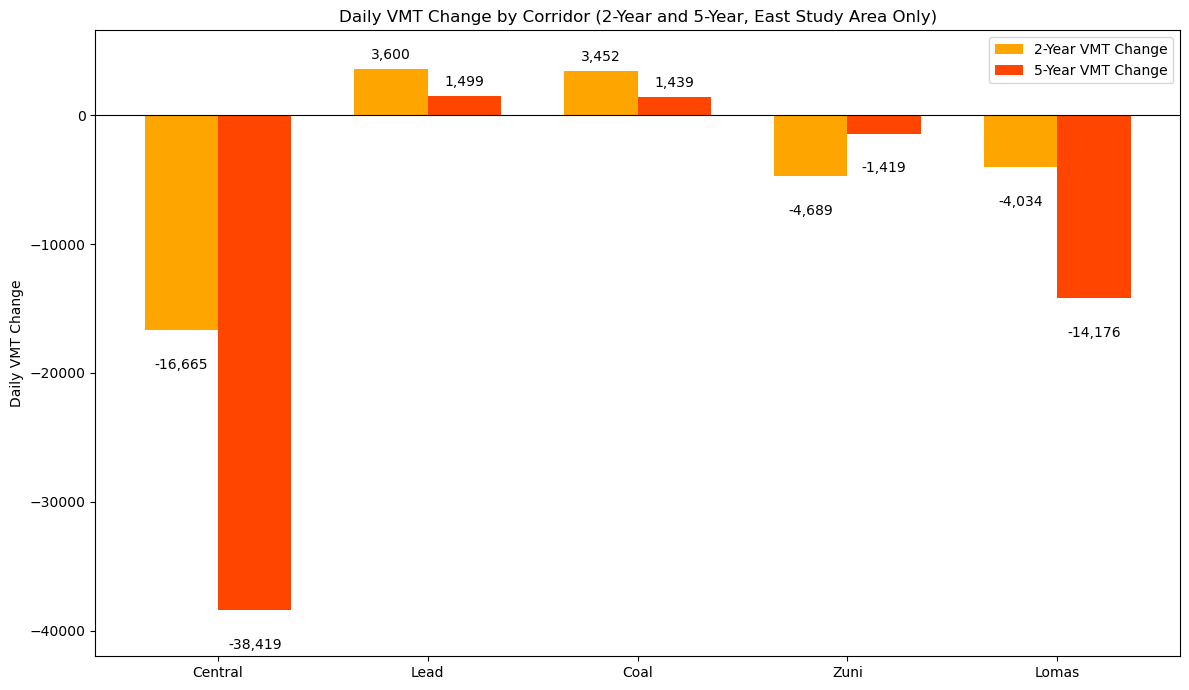

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Corridor names
corridors = ['Central', 'Lead', 'Coal', 'Zuni', 'Lomas']

# Updated VMT change values for eastern study area
vmt_change_2yr = [-16665, 3600, 3452, -4689, -4034]
vmt_change_5yr = [-38419, 1499, 1439, -1419, -14176]

x = np.arange(len(corridors))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))

bars1 = ax.bar(x - width/2, vmt_change_2yr, width, label='2-Year VMT Change', color='orange')
bars2 = ax.bar(x + width/2, vmt_change_5yr, width, label='5-Year VMT Change', color='orangered')

# Set labels and title
ax.set_ylabel('Daily VMT Change')
ax.set_title('Daily VMT Change by Corridor (2-Year and 5-Year, East Study Area Only)')
ax.set_xticks(x)
ax.set_xticklabels(corridors)
ax.axhline(0, color='black', linewidth=0.8)
ax.legend()

# Set custom y-axis limits for spacing
ax.set_ylim(-42000, max(vmt_change_2yr + vmt_change_5yr) + 3000)

# Annotate bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height):,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5 if height >= 0 else -20),
                    textcoords="offset points",
                    ha='center', va='bottom' if height >= 0 else 'top')

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()
plt.savefig("vmt_change_by_corridor_east_only.png", dpi=300)
plt.show()
